In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\hp\\Downloads\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  
0           203.319595  
1           402.197302  
2           553.132096  
3           292.430579  
4           246.540576  
2
(15290, 7)


In [2]:
# pd.get_dummies allows to convert a categorical variable into dummy variables
# Create a set of dummy variables from the sex variable
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Married], axis=1)         
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,F,M,Married,Single
0,150024,24,5,1,M,Married,203.319595,0,1,1,0
1,144880,31,10,1,F,Single,402.197302,1,0,0,1
2,133742,56,37,1,M,Married,553.132096,0,1,1,0
3,151282,52,31,1,F,Married,292.430579,1,0,1,0
4,174407,20,3,1,M,Single,246.540576,0,1,0,1


In [3]:
df_new.corr()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,F,M,Married,Single
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794,-0.000979,0.000979,-0.002090,0.002090
Age,0.008291,1.000000,0.997161,0.008366,-0.442962,-0.005396,0.005396,-0.004321,0.004321
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115,-0.007385,0.007385,-0.005029,0.005029
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553,0.001155,-0.001155,-0.009524,0.009524
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000,-0.184339,0.184339,-0.265330,0.265330
F,-0.000979,-0.005396,-0.007385,0.001155,-0.184339,1.000000,-1.000000,0.008002,-0.008002
M,0.000979,0.005396,0.007385,-0.001155,0.184339,-1.000000,1.000000,-0.008002,0.008002
Married,-0.002090,-0.004321,-0.005029,-0.009524,-0.265330,0.008002,-0.008002,1.000000,-1.000000
Single,0.002090,0.004321,0.005029,0.009524,0.265330,-0.008002,0.008002,-1.000000,1.000000


In [4]:
dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5))

   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576


In [5]:
dfClean.corr()

,Age,Number of Vehicles,F,Single,Losses in Thousands
Age,1.000000,0.008366,-0.005396,0.004321,-0.442962
Number of Vehicles,0.008366,1.000000,0.001155,0.009524,-0.011553
F,-0.005396,0.001155,1.000000,-0.008002,-0.184339
Single,0.004321,0.009524,-0.008002,1.000000,0.265330
Losses in Thousands,-0.442962,-0.011553,-0.184339,0.265330,1.000000


In [6]:
# AGe Negative 0.44  : Low
#NVEH Nrgative Negligible low
# F - Gender : 0.20
#Single : Postive : Low

# None of this is Good enough to Predict - Y
#


dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})

print(dfClean.head(5))



   Age  nVeh  F  Single         LTh
0   24     1  0       0  203.319595
1   31     1  1       1  402.197302
2   56     1  0       0  553.132096
3   52     1  1       0  292.430579
4   20     1  0       1  246.540576


In [7]:
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
results = smf.ols('LTh ~ Age + F + Single', data=dfClean).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    LTh   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     2202.
Date:                Thu, 27 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:40:16   Log-Likelihood:            -1.0360e+05
No. Observations:               15290   AIC:                         2.072e+05
Df Residuals:                   15286   BIC:                         2.072e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    632.6059      4.963    127.469      0.0

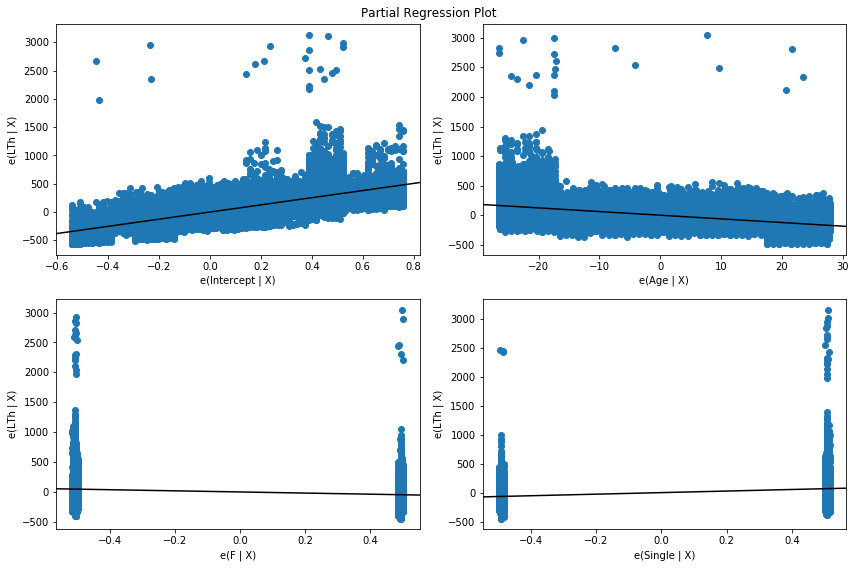

In [8]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

In [ ]:
# Low Correlation Between Values
# Wide RAnge of Y variable for a single "X"  - Narrow Range: Better Result


# There is a Significan ce of Age, Gender, Maritial status

In [10]:
# Possible Improvements
#  Invers of y = 1/y
# Log(Y)  , Log(x)
# Salary 10,000 -> 10,00,000
#         4         6
# Sqrt of X, Y
# Exponential



In [11]:
from statsmodels.formula.api import rlm
rob_crime_model = rlm("LTh ~ Age + nVeh + F + Single", data=dfClean, 
                      M=sm.robust.norms.TukeyBiweight(3)).fit(conv="weights")

print(rob_crime_model.summary())

# RLM - Robust Linear Model
# https://www.statsmodels.org/dev/generated/statsmodels.robust.robust_linear_model.RLM.html

#Mstatsmodels.robust.norms.RobustNorm, optional
#The robust criterion function for downweighting outliers. 
#The current options are 
#LeastSquares, HuberT, RamsayE, AndrewWave, TrimmedMean, Hampel, and TukeyBiweight
 
#The default is HuberT(). 
#See statsmodels.robust.norms for more information.

                    Robust linear Model Regression Results                    
Dep. Variable:                    LTh   No. Observations:                15290
Model:                            RLM   Df Residuals:                    15285
Method:                          IRLS   Df Model:                            4
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 27 Jun 2019                                         
Time:                        09:56:05                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    544.1037      5.692     95.592      0.0

In [ ]:
#####
# PandaSql is Not working here !!
###